In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot

Working with cancer data first

In [22]:
df = pd.read_csv('C:/Users/butle/hp/Capstone_Two/data/interim/cancer_data.csv')
df.head()

,CensusTract,Cancer_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.0,4.8,5.2,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.0,7.5,8.4,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,6.2,6.0,6.3,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.1,5.9,6.3,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.1,6.7,7.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [30]:
np.mean(df['Cancer_prevalence'])

6.135929095861621

Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

In [23]:
df.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df.set_index('CensusTract', inplace=True)
df.head()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


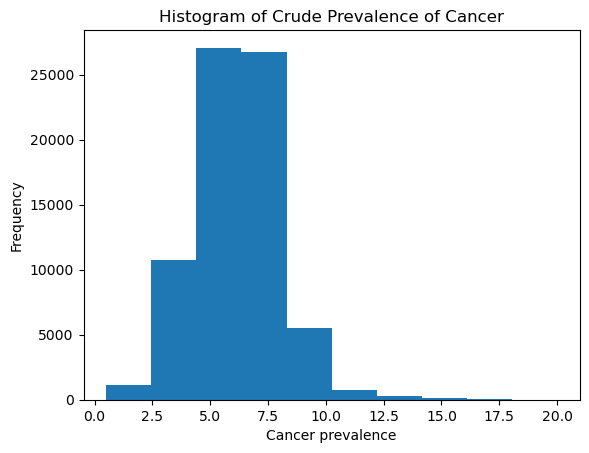

In [24]:
_ = plt.hist(df['Cancer_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Cancer prevalence')
_ = plt.title('Histogram of Crude Prevalence of Cancer')

Visualizing parameters to see any clear correlations.

In [25]:
df.corr()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Cancer_prevalence,1.000000,-0.219611,-0.106416,-0.317580,-0.199981,-0.306677,-0.246381,-0.062947,-0.119024,-0.220501,-0.151194,-0.001731
PM25,-0.219611,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.106416,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.317580,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.199981,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.306677,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.246381,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,-0.062947,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.119024,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.220501,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


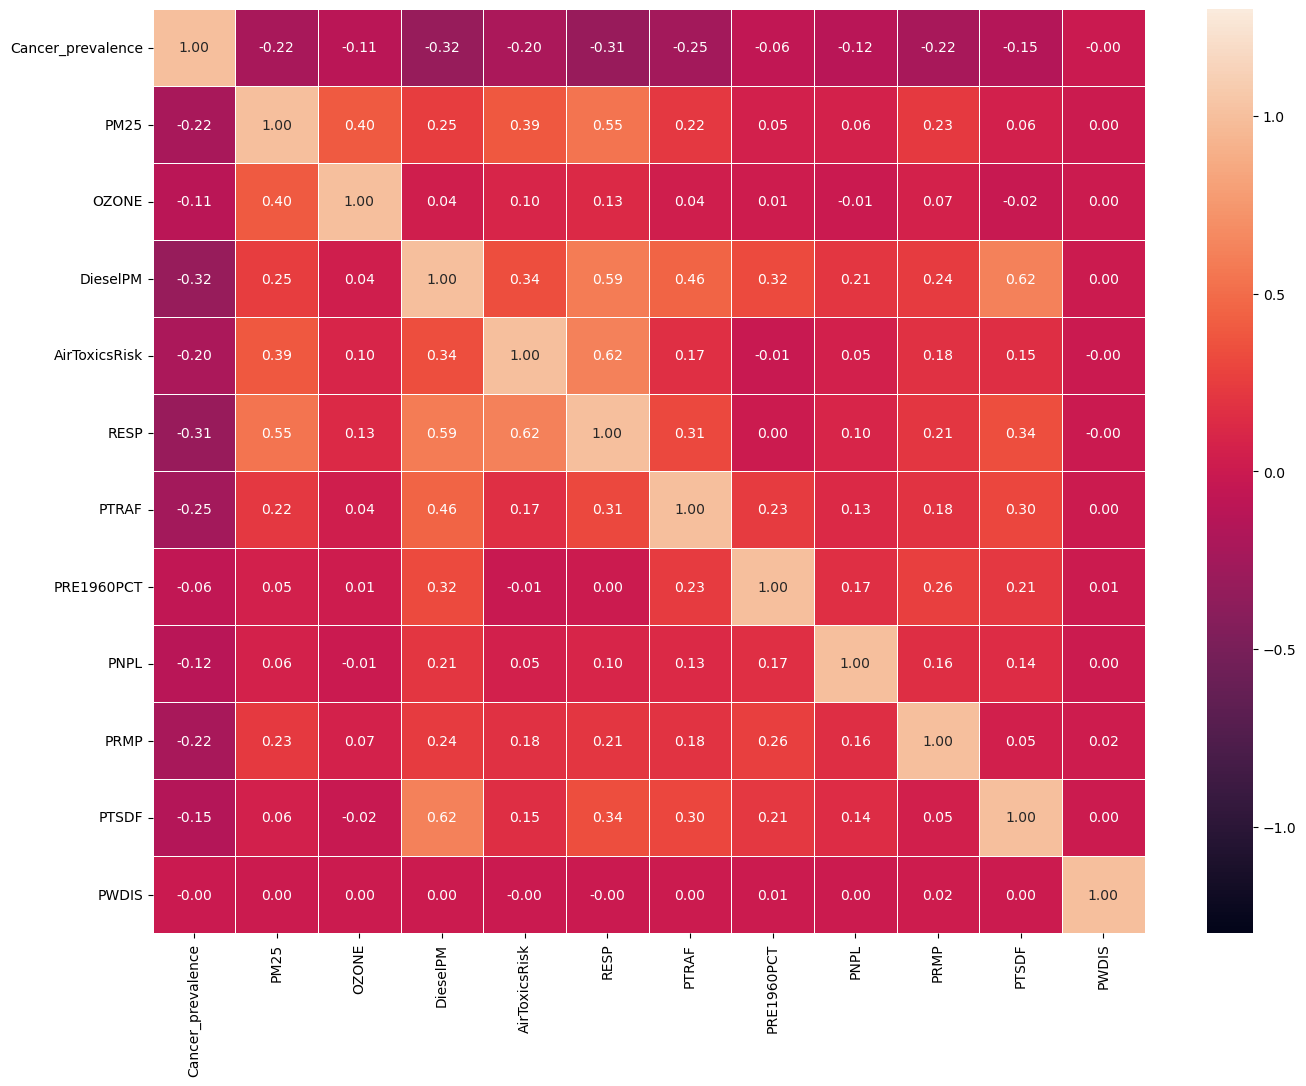

In [26]:
f, ax = plt.subplots(figsize=(16, 12))
_ = sns.heatmap(df.corr(), vmin=-1.3, vmax=1.3, annot=True, fmt=".2f", linewidth=.5)

None of these environmental factors are positively correlated with cancer.

In [27]:
X = df.copy()
X = X.drop('Cancer_prevalence', axis=1)
y = df['Cancer_prevalence']

In [28]:
X = sm.add_constant(X)

In [29]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

NameError: name 'sklearn' is not defined

In [ ]:
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))